## Principal Component Analysis Explained

In this notebook, I will try to explain the principal component analysis, which is a method for dimensionality reduction.

For this notebook, I assume you have basic knowledge of data, dimensions and stuff like that. (Basics of Linear algebra)

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)

### Generating some random data, to proceed further.

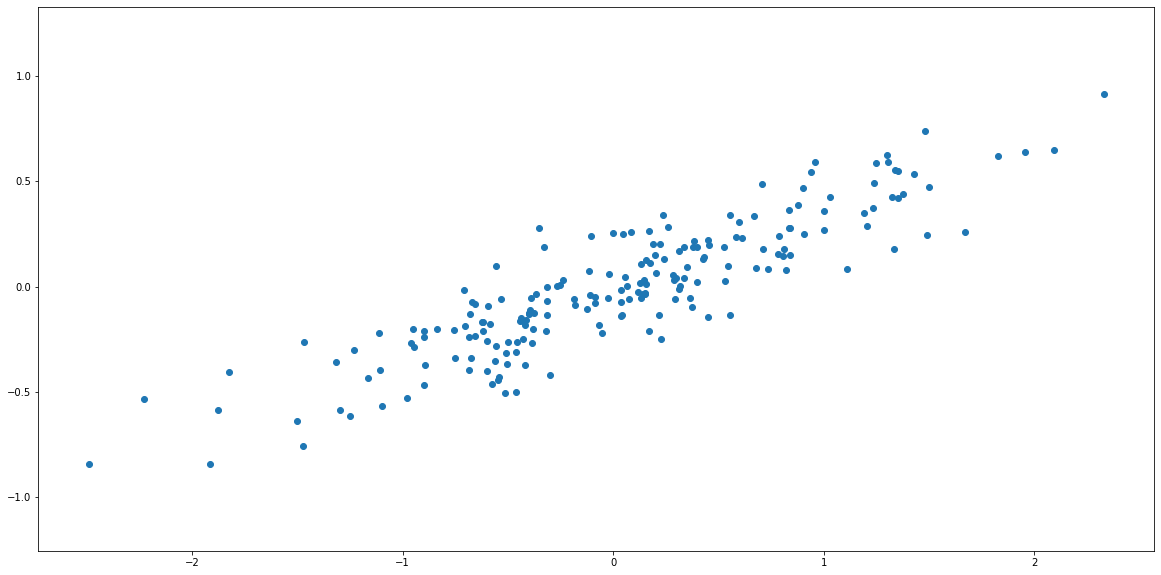

In [6]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

### We can use the `sklearn.decomposition.PCA` class to perform the PCA.

In [7]:
from sklearn.decomposition import PCA #importing PCA from sklearn
pca = PCA(n_components=2) #Defining the number of components I want PCA to keep (here, the data is 2D, and I have choosen 2 components. I did this just to show effect of PCA, Later we will look at reducing dimension)
pca.fit(X) #fitting the data to PCA

PCA(n_components=2)

### After fitting, it stores 2 crucial parameters: `components_` and `explained_variance_`

In [9]:
print(pca.components_) #the components of the data

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [11]:
print(pca.explained_variance_) #the explained variance of the data

[0.7625315 0.0184779]


### But what do these values mean?

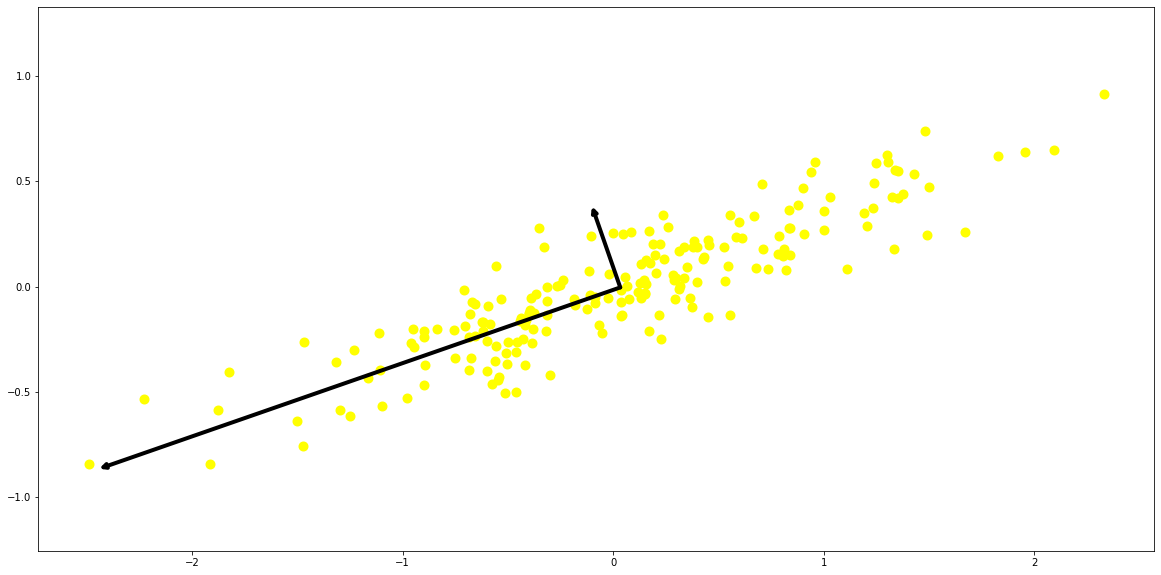

In [12]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=4,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], color='yellow' , linewidths=4, alpha=1)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

What have we done here?
First we defined a function to draw the vector.
Then, based on the explained variance, and the components, we can draw the vector.

Here, the longest line, represents the axis along which, the data has the most variance.
This is also called as the principal component.

Now with these components, we can transform the data to a new space, and see how the data looks like in the new space.

'\nNow what we have did is, transformed the data to a new space, and the axis we used to transformation were the principal components axis.\n'

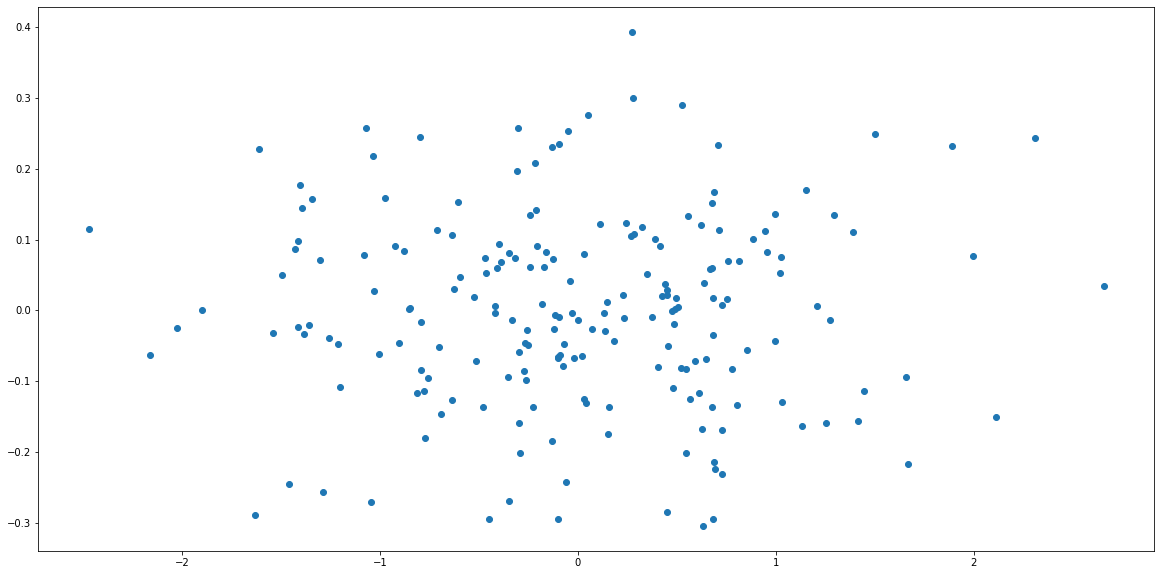

In [21]:
Y = pca.fit_transform(X) #transforming the data to new space
plt.scatter(Y[:, 0], Y[:, 1])
"""
Now what we have did is, transformed the data to a new space, and the axis we used to transformation were the principal components axis.
"""

Lets see how the data is spread across this space

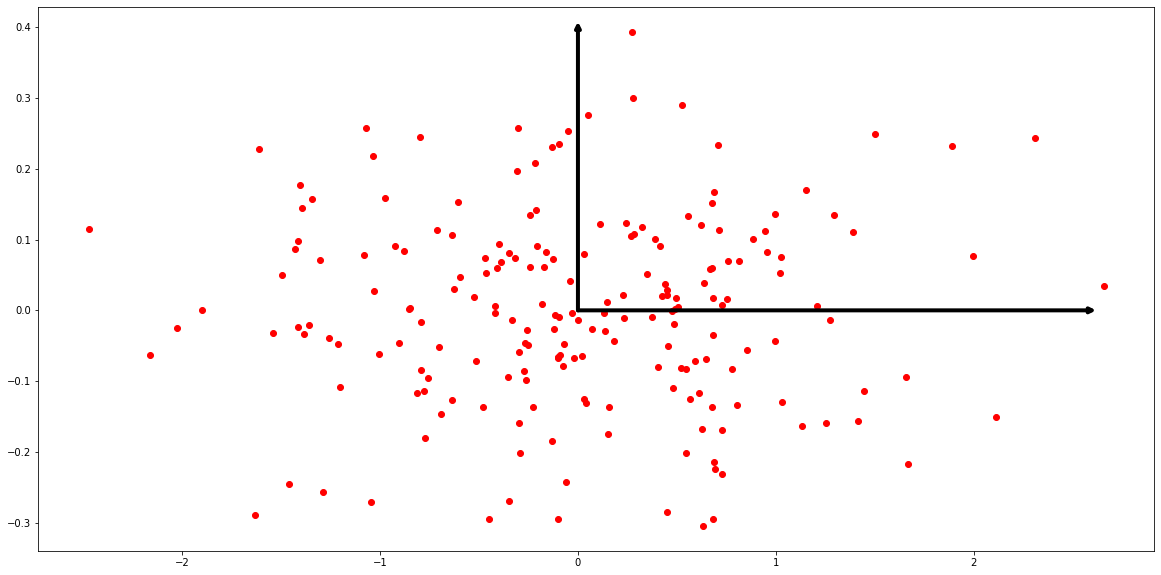

In [24]:
#Here I defined new PCA class, so that it can store a different set of values for variance and components.
pca_new = PCA(n_components=2)
X_pca = pca.transform(X)
pca_new.fit(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='red'  ,alpha=1)
for length, vector in zip(pca_new.explained_variance_, pca_new.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca_new.mean_, pca_new.mean_ + v)

Here, we can see that the data is spread across the new space, with the axis being the traditional X and Y axis.
This is because, we took the principal components of the data, used it as the axis for transformation.
What did we achieve?

We got the data in the new space, where it as as much variance along the X and Y axis.

### Doing dimensionality reduction

In [26]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


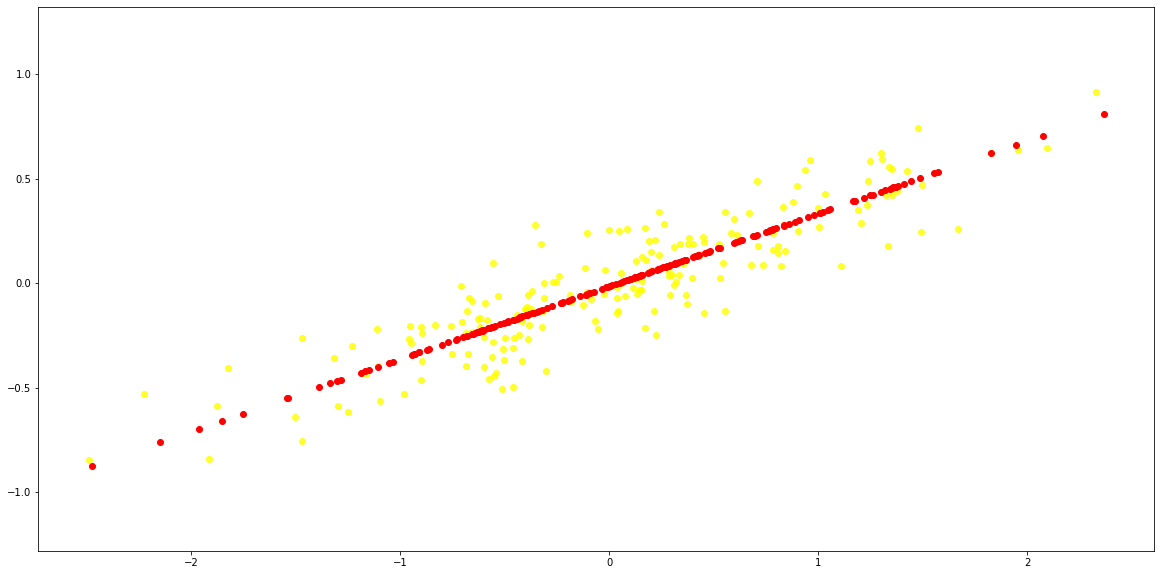

In [28]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], color='yellow' ,alpha=0.8)
plt.scatter(X_new[:, 0], X_new[:, 1], color='red'  ,alpha=1)
plt.axis('equal');

#The line in red is the reduced plot, and the yellow dots are the original data

### Further exploration

[Principal Component Analysis - Computerphile](https://www.youtube.com/watch?v=TJdH6rPA-TI)

This one video is enough to grasp what PCA actually means.

Here is a notebook in which I use PCA to compress image.

[Image Compression with PCA](./Image_Compression_with_PCA.ipynb)